# **Assignment 5**:  Vectorization + Zipf's Law 
##### Emily Daskas


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from collections import OrderedDict

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


####**Problem 1**
**Suppose we have the following 5 2-D vectors representing 5 separate documents.**

A = (3,7)

B = (5,36)

C = (7,29)

D = (212,72)

E = (23, 2)

In [ ]:
A = np.array([3,7])
B = np.array([5,36])
C = np.array([7,29])
D = np.array([212,72])
E = np.array([23,2])

all_vectors = np.array([A,B,C,D,E])



a) Compute the following: 𝐴𝑁𝑜𝑟𝑚, 𝐵𝑁𝑜𝑟𝑚, 𝐶𝑁𝑜𝑟𝑚, 𝐷𝑁𝑜𝑟𝑚, 𝐸𝑁𝑜𝑟𝑚



In [ ]:
def normalize_vector(vector):
  dot_product = np.dot(vector[0], vector[1])
  return vector/np.linalg.norm(vector)

In [ ]:
norm_A = normalize_vector(A)
norm_B = normalize_vector(B)
norm_C = normalize_vector(C)
norm_D = normalize_vector(D)
norm_E = normalize_vector(E)
all_norm_vectors = [norm_A, norm_B, norm_C, norm_D, norm_E]

In [ ]:
for i in range(len(all_vectors)):
  print("Normalized vector", all_vectors[i], ":", all_norm_vectors[i])

Normalized vector [3 7] : [0.3939193  0.91914503]
Normalized vector [ 5 36] : [0.13756837 0.99049227]
Normalized vector [ 7 29] : [0.23464053 0.97208221]
Normalized vector [212  72] : [0.94688159 0.32158243]
Normalized vector [23  2] : [0.99624059 0.08662962]


b) Compute the Euclidean distance between all the 5 normalized vectors computed in step a.

In [ ]:
def compute_euclidean(vector1, vector2):
  return np.sqrt(((vector1 - vector2) ** 2).sum())

In [ ]:
all_distances = []
for i in all_norm_vectors:
  distances = []
  for j in all_norm_vectors:
    distances.append(compute_euclidean(i, j))
  print(distances)

[0.0, 0.2660943949735793, 0.16784537528545287, 0.814154997289469, 1.0275567380419863]
[0.2660943949735793, 0.0, 0.09880250543856026, 1.0499658409229273, 1.2467099416034624]
[0.16784537528545287, 0.09880250543856026, 0.0, 0.9645917727039076, 1.16793019353233]
[0.814154997289469, 1.0499658409229273, 0.9645917727039076, 0.0, 0.24008151480866866]
[1.0275567380419863, 1.2467099416034624, 1.16793019353233, 0.24008151480866866, 0.0]


c) Compute the Manhattan distance between all the 5 normalized vectors computed in step a.

In [ ]:
def compute_manhattan(vector1, vector2):
  return np.abs(vector1 - vector2).sum()

In [ ]:
all_distances = []
for i in all_norm_vectors:
  distances = []
  for j in all_norm_vectors:
    distances.append(compute_manhattan(i, j))
  print(distances)

[0.0, 0.32769817046417377, 0.21221594403049976, 1.1505248938014545, 1.4348367032697311]
[0.32769817046417377, 0.0, 0.115482226433674, 1.4782230642656284, 1.7625348737339048]
[0.21221594403049976, 0.115482226433674, 0.0, 1.3627408378319543, 1.6470526473002307]
[1.1505248938014545, 1.4782230642656284, 1.3627408378319543, 0.0, 0.28431180946827656]
[1.4348367032697311, 1.7625348737339048, 1.6470526473002307, 0.28431180946827656, 0.0]


d) Compute the “Cosine similarity”and“Cosine distance”between all the 5 normalized vectors computed in step a.

In [ ]:
vector_query = np.array([1,1])
normalized_query = vector_query / np.linalg.norm(vector_query)

In [ ]:
def compute_cosine_similarity(norm_vector, norm_query):
  return np.dot(norm_query, norm_vector)

In [ ]:
all_distances = []
for i in all_norm_vectors:
  distances = []
  for j in all_norm_vectors:
    distances.append(compute_cosine_similarity(i, j))
  print(distances)

[0.9999999999999998, 0.9645968864818224, 0.9859139649976426, 0.6685758201942922, 0.4720635750522563]
[0.9645968864818224, 1.0000000000000002, 0.9951190324595317, 0.4487858664475053, 0.22285716075354592]
[0.9859139649976426, 0.9951190324595317, 0.9999999999999999, 0.5347813560159665, 0.31796953151776697]
[0.6685758201942922, 0.4487858664475053, 0.5347813560159665, 1.0, 0.9711804331235875]
[0.4720635750522563, 0.22285716075354592, 0.31796953151776697, 0.9711804331235875, 1.0]


In [ ]:
def compute_cosine_distance(vector1, vector2):
  return 1 - compute_cosine_similarity(vector1, vector2)


In [ ]:
all_distances = []
for i in all_norm_vectors:
  distances = []
  for j in all_norm_vectors:
    distances.append(compute_cosine_distance(i, j))
  print(distances)

[2.220446049250313e-16, 0.0354031135181776, 0.014086035002357389, 0.3314241798057078, 0.5279364249477436]
[0.0354031135181776, -2.220446049250313e-16, 0.004880967540468295, 0.5512141335524947, 0.7771428392464541]
[0.014086035002357389, 0.004880967540468295, 1.1102230246251565e-16, 0.46521864398403345, 0.682030468482233]
[0.3314241798057078, 0.5512141335524947, 0.46521864398403345, 0.0, 0.028819566876412517]
[0.5279364249477436, 0.7771428392464541, 0.682030468482233, 0.028819566876412517, 0.0]


####**Problem 2**
**Suppose a user enters a query to a search engine.  The query vector is (4,23).**

  • Compute the Cosine distance between the normalized query vector and all the 5 normalized vectors representing documents used in problem#1.

  • Out of the 5 documents used in problem#1, which document is closest to the query vector?

In [ ]:
query_vector = np.array([4,23])
norm_query_vector = normalize_vector(query_vector)

In [ ]:
for v in all_norm_vectors:
  print(compute_cosine_distance(norm_query_vector, v))

0.026952916666384774
0.0005842430643980823
0.0020895968762466577
0.5209334096470837
0.7439544509255165


*Answer: B was the closest to the query vector. We can see the cosine distance for B, .0005, is the smallest.*

Plot all the 5 vectors and the query vector. Show in your plot that the second document ‘B’ is closest to the query vector.

No handles with labels found to put in legend.


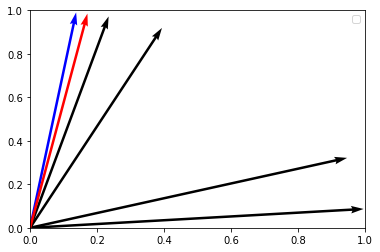

In [ ]:
plt.quiver(
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [norm_A[0], norm_B[0], norm_C[0], norm_D[0], norm_E[0], norm_query_vector[0]],
    [norm_A[1], norm_B[1], norm_C[1], norm_D[1], norm_E[1], norm_query_vector[1]],
    color = ['k','b','k','k','k','r'],
  angles = 'xy', scale_units='xy', scale = 1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()
    

####**Problem 3**
**Suppose we have the following 2 documents.**

**Document 1** 
*It’s become a familiar sight for the Chapman community: President Daniele Struppa standing on stage at the Musco Center, addressing a combined audience of university faculty, staff and university supporters.*

**Document 2** 
*What was different this year —as has been the case for most events this year —was that everyone in the audience was viewing the address from home.*

In [ ]:
document_1 = "It’s become a familiar sight for the Chapman community: President Daniele Struppa standing on stage at the Musco Center, addressing a combined audience of university faculty, staff and university supporters."
document_2 = "What was different this year —as has been the case for most events this year —was that everyone in the audience was viewing the address from home."

1. Using the Count Vectorizer compute the BOW (Bag-of-words) vector for each of the document. 



In [ ]:
tokenizer = TreebankWordTokenizer()
tokens_1 = tokenizer.tokenize(document_1.lower())
bag_of_words_1 = Counter(tokens_1)
tokens_2 = tokenizer.tokenize(document_2.lower())
bag_of_words_2 = Counter(tokens_2)


In [ ]:
bag_of_words_1

Counter({',': 2,
         '.': 1,
         ':': 1,
         'a': 2,
         'addressing': 1,
         'and': 1,
         'at': 1,
         'audience': 1,
         'become': 1,
         'center': 1,
         'chapman': 1,
         'combined': 1,
         'community': 1,
         'daniele': 1,
         'faculty': 1,
         'familiar': 1,
         'for': 1,
         'it': 1,
         'musco': 1,
         'of': 1,
         'on': 1,
         'president': 1,
         's': 1,
         'sight': 1,
         'staff': 1,
         'stage': 1,
         'standing': 1,
         'struppa': 1,
         'supporters': 1,
         'the': 2,
         'university': 2,
         '’': 1})

In [ ]:
bag_of_words_2

Counter({'.': 1,
         'address': 1,
         'audience': 1,
         'been': 1,
         'case': 1,
         'different': 1,
         'events': 1,
         'everyone': 1,
         'for': 1,
         'from': 1,
         'has': 1,
         'home': 1,
         'in': 1,
         'most': 1,
         'that': 1,
         'the': 3,
         'this': 2,
         'viewing': 1,
         'was': 2,
         'what': 1,
         'year': 2,
         '—as': 1,
         '—was': 1})


2. Compute the TF (Term Frequency) of each word of these 2 documents using only the count of the words in that document.




In [ ]:
blobTotal = TextBlob(textTotal)


NameError: ignored

In [ ]:
lexicon = set(bag_of_words_1).union(set(bag_of_words_2))
count_words1 = dict.fromkeys(lexicon, 0)

In [ ]:

bag_of_words_1 = document_1.split(' ')
bag_of_words_2 = document_2.split(' ')
def count_words(bag_of_words, count_words, lexicon):
  num_words = dict.fromkeys(lexicon, 0)
  for word in bag_of_words:
    num_words[word] += 1
  return num_words
doc_sorted_1 = sorted(count_words(bag_of_words_1, count_words, lexicon).items(), key = lambda x :x[0])
doc_sorted_2 = sorted(count_words(bag_of_words_2, count_words, lexicon).items(), key = lambda x :x[0])
df_1 = pd.DataFrame(doc_sorted_1, columns= ['word', 'frequency 1'])

df_2 = pd.DataFrame(doc_sorted_2, columns= ['word', 'frequency 2'])
df_12 = pd.merge(df_1, df_2, on= 'word')
df_12


,word,frequency 1,frequency 2
0,"Center,",1,0
1,Chapman,1,0
2,Daniele,1,0
3,It’s,1,0
4,Musco,1,0
5,President,1,0
6,Struppa,1,0
7,What,0,1
8,a,2,0
9,address,0,1


In [ ]:
def compute_TF(word_dict, bag_of_words):
  tf_dict = {}
  bag_of_words_count = len(bag_of_words)
  for word, count in word_dict.items():
    tf_dict[word] = count / float(bag_of_words_count)
  return tf_dict

In [ ]:
tf_1 = compute_TF(count_words1, bag_of_words_1)
tf1_sorted = sorted(tf_1.items(), key = lambda x : x[0])
df_tf1 = pd.DataFrame(tf1_sorted, columns=['Word', 'tf'])
print(df_tf1)

AttributeError: ignored

In [ ]:
tf_2 = compute_TF(count_words2, bag_of_words_2)
tf2_sorted = sorted(tf_2.items(), key = lambda x : x[0])
df_tf2 = pd.DataFrame(tf2_sorted, columns=['Word', 'tf'])
print(df_tf2)

NameError: ignored

3. Build a Lexicon (set of all words) of these 2 documents.  Compute the TF (Term Frequency) of each word of these 2 documents using the count of the words in the Lexicon.

In [ ]:
for word in bag_of_words_1:
  count_words1[word] += 1
print("Num words in Document 1:")
print(count_words1)

Num words in Document 1:
{'on': 1, 'President': 1, 'stage': 1, 'a': 2, 'Struppa': 1, 'different': 0, 'faculty,': 1, 'case': 0, 'Chapman': 1, 'from': 0, 'Daniele': 1, 'address': 0, '—as': 0, 'for': 1, 'staff': 1, 'addressing': 1, 'combined': 1, 'Center,': 1, 'and': 1, 'audience': 1, 'year': 0, 'in': 0, 'everyone': 0, 'has': 0, 'university': 2, 'at': 1, 'events': 0, 'most': 0, 'viewing': 0, 'that': 0, 'home.': 0, 'sight': 1, 'Musco': 1, 'What': 0, 'community:': 1, 'become': 1, 'was': 0, 'been': 0, '—was': 0, 'familiar': 1, 'standing': 1, 'It’s': 1, 'the': 2, 'supporters.': 1, 'this': 0, 'of': 1}


In [ ]:
count_words2 = dict.fromkeys(lexicon, 0)
for word in bag_of_words_2:
  count_words2[word] += 1
print("Num words in Document 2:")
print(count_words2)

Num words in Document 2:
{'on': 0, 'President': 0, 'stage': 0, 'a': 0, 'Struppa': 0, 'different': 1, 'faculty,': 0, 'case': 1, 'Chapman': 0, 'from': 1, 'Daniele': 0, 'address': 1, '—as': 1, 'for': 1, 'staff': 0, 'addressing': 0, 'combined': 0, 'Center,': 0, 'and': 0, 'audience': 1, 'year': 2, 'in': 1, 'everyone': 1, 'has': 1, 'university': 0, 'at': 0, 'events': 1, 'most': 1, 'viewing': 1, 'that': 1, 'home.': 1, 'sight': 0, 'Musco': 0, 'What': 1, 'community:': 0, 'become': 0, 'was': 2, 'been': 1, '—was': 1, 'familiar': 0, 'standing': 0, 'It’s': 0, 'the': 3, 'supporters.': 0, 'this': 2, 'of': 0}


####**Problem 4**

In [ ]:
text_total_romeo = open('/RomeoJuliet.txt').read()
blob_total_romeo = TextBlob(text_total_romeo)
text_total_hamlet = open('/Hamlet.txt').read()
blob_total_hamlet = TextBlob(text_total_hamlet)
puncs = set((',', '.', '--', '-', '?', ';', ':', "''", '``', '(', ')', '[', ']'))

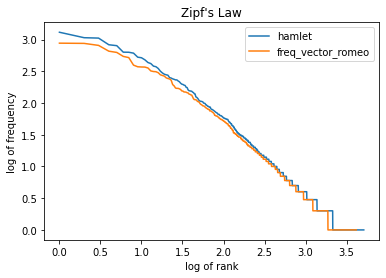

In [ ]:
word_list_romeo = (x.lower() for x in blob_total_romeo.words if x not in puncs and '_' not in x and ' ' not in x)
word_list_hamlet = (x.lower() for x in blob_total_hamlet.words if x not in puncs and '_' not in x and ' ' not in x)
token_counts_romeo = Counter(word_list_romeo)
token_counts_hamlet = Counter(word_list_hamlet)

sorted_token_counts_romeo = OrderedDict(sorted(token_counts_romeo.items(), key = lambda kv : kv[1], reverse = True))
sorted_token_counts_hamlet= OrderedDict(sorted(token_counts_hamlet.items(), key = lambda kv : kv[1], reverse = True))

freq_vector_romeo = np.array(list(sorted_token_counts_romeo.values()))
freq_vector_hamlet = np.array(list(sorted_token_counts_hamlet.values()))

plt.plot(np.log10(np.arange(1, len(sorted_token_counts_hamlet)+1)), np.log10(freq_vector_hamlet))

plt.plot(np.log10(np.arange(1, len(sorted_token_counts_romeo)+1)), np.log10(freq_vector_romeo))
plt.xlabel('log of rank')
plt.ylabel('log of frequency')
plt.title("Zipf's Law")
plt.legend([ 'hamlet', 'freq_vector_romeo'])